In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_listing.csv', low_memory=False) 

In [4]:
df = df.drop(df.columns[0], axis= 'columns')

<b> Objective of Capstone Project: </b> Create a Price Predictor for Listing 
Based on key attributes: neighborhood, number of guests, reviews per month, space, length of stay, room type

In [5]:
#listing out columns to see what to analyze
list(df.columns)

['id',
 'listing_url',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_id',
 'host_url',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum

Step 1: Finding correlation between metrics

In [10]:
df.corr().head()
#outputs in 41 rows & 41 columns

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,0.557845,0.194646,0.194646,0.060932,0.071224,-0.069898,0.057471,-0.069515,-0.079240,...,-0.012340,-0.066377,-0.055810,-0.041926,-0.024381,0.287289,0.252059,0.224423,0.108701,0.115564
host_id,0.557845,1.000000,0.046489,0.046489,0.079793,0.013667,-0.088281,0.081265,-0.072907,-0.082491,...,-0.039648,-0.067758,-0.087964,-0.024844,-0.059627,0.239493,0.148648,0.394988,0.161882,0.147433
host_listings_count,0.194646,0.046489,1.000000,1.000000,0.167777,0.158904,-0.018145,-0.013911,-0.031024,-0.068273,...,-0.025171,-0.121382,-0.090836,-0.061649,-0.095372,0.810434,0.898448,0.049014,-0.034431,-0.135918
host_total_listings_count,0.194646,0.046489,1.000000,1.000000,0.167777,0.158904,-0.018145,-0.013911,-0.031024,-0.068273,...,-0.025171,-0.121382,-0.090836,-0.061649,-0.095372,0.810434,0.898448,0.049014,-0.034431,-0.135918
latitude,0.060932,0.079793,0.167777,0.167777,1.000000,0.182245,-0.042502,0.086349,-0.100549,-0.036708,...,-0.054376,-0.094462,-0.084085,0.154978,-0.100271,0.220487,0.194193,0.151441,0.120182,-0.193693


In [8]:
#Pick key numerical columns to compare
numerical_list = ['price','host_total_listings_count','accommodates','number_of_reviews',
                  'minimum_nights','maximum_nights','beds','security_deposit','cleaning_fee',
                  'review_scores_value','guests_included','number_of_reviews','number_of_reviews_ltm',
                  'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                  'review_scores_communication','review_scores_location','calculated_host_listings_count',
                  'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                  'calculated_host_listings_count_shared_rooms'
                 ]

In [12]:
#finding correlations with the numerical fields
df[numerical_list].corr().head()

,price,host_total_listings_count,accommodates,number_of_reviews,minimum_nights,maximum_nights,beds,security_deposit,cleaning_fee,review_scores_value,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
price,1.000000,-0.024439,0.372464,-0.086914,-0.005370,-0.005394,0.295300,0.168536,0.187134,0.031206,...,0.101277,0.058768,0.103559,0.031315,0.042112,0.060783,-0.045176,-0.029974,-0.050902,-0.099797
host_total_listings_count,-0.024439,1.000000,-0.018145,-0.158614,-0.003233,-0.003090,-0.068273,-0.007322,0.479245,-0.095372,...,-0.029645,-0.043311,-0.025171,-0.121382,-0.090836,-0.061649,0.810434,0.898448,0.049014,-0.034431
accommodates,0.372464,-0.018145,1.000000,-0.056078,-0.000768,-0.000782,0.798427,0.223285,0.419674,0.011493,...,0.086429,0.047672,0.063502,0.027371,0.054472,0.043954,-0.091499,-0.053419,-0.145111,-0.141325
number_of_reviews,-0.086914,-0.158614,-0.056078,1.000000,-0.005100,-0.005183,-0.042523,-0.087059,-0.187478,0.093753,...,0.053647,0.113462,0.093082,0.124541,0.110674,0.090638,-0.205044,-0.193071,-0.121974,-0.020300
minimum_nights,-0.005370,-0.003233,-0.000768,-0.005100,1.000000,0.999999,0.002528,-0.005654,-0.008050,-0.005817,...,-0.009700,-0.014073,0.006021,0.003251,0.003447,0.005438,-0.004464,-0.003992,-0.003040,-0.002176


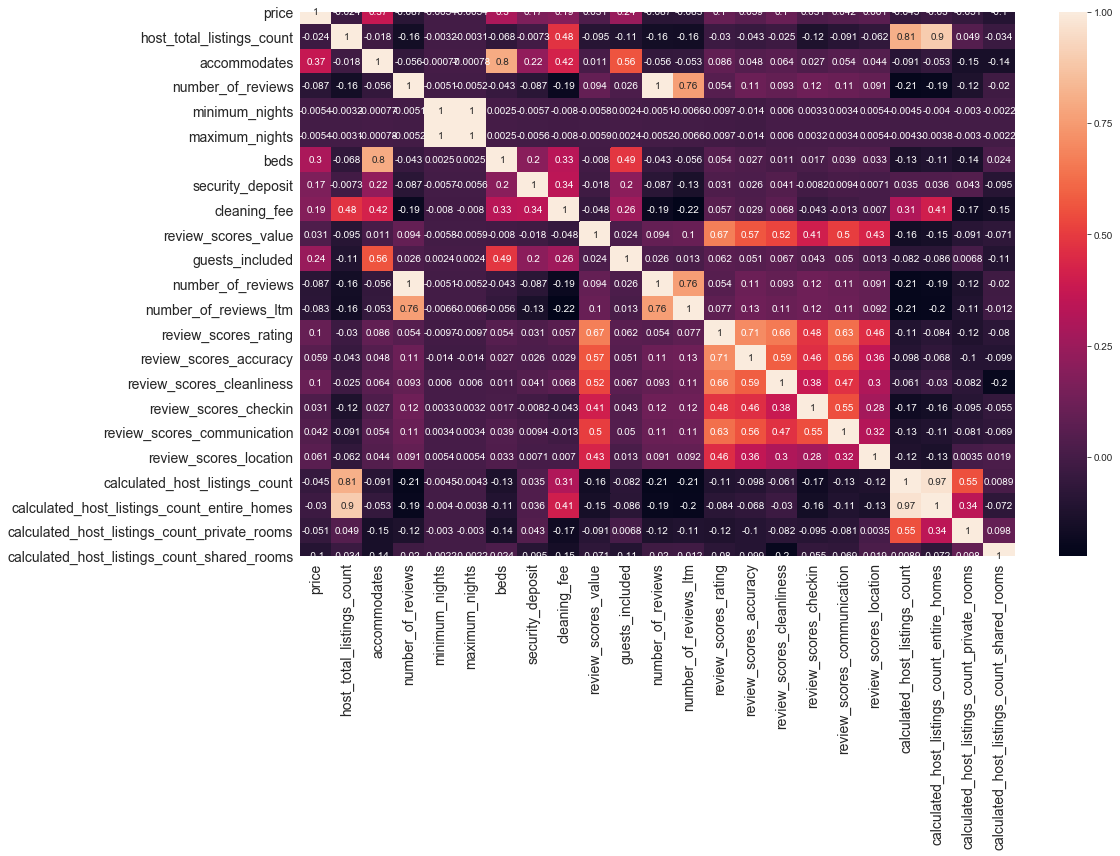

In [160]:
plt.figure(figsize=(16,10))
sns.heatmap(df[numerical_list].corr(), annot = True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Findings from correlation heat map: 
- Unsurprisingly, price has a higher correlation to the capacity of the space; fields such as the # of accomodations, # of beds, # of guests included have a higher correlation with price
- Correlation between price and rating isn't that high as price doesn't determine high or low ratings 
- Other obvious correlations include # of accomodates and # of beds, number of reviews vs. number of reviews in the last 12 months, review scores across dimensions 
- For review scores, it seems like the reviews on one factor is connected to the reviews on other factors (e.g: review on cleanliness is related to the review on accuracy) 
- Listing counts per host has some relation to cleaning fees per listing; I wonder if hosts has more listings then the cleaning fees would decrease as the service can be shared across the different listings
- On the other hand, price doesn't seem to have much correlation with the count of listings per host or number of reviews
- Additionally, the number of reviews per listing doesn't seem to be related to the host's total count of listings; I think the majority of hosts has just 1 listing and it's rarer for 1 host to amass high volume of reviews across multiple listings (unless they're a superhost or great at marketing)


In [162]:
#cramer's v? I want to compare categorical values with the numerical values
# e.g: price with neighborhood, price with room type, price with policy

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,security_deposit_null_flag,security_deposit_buckets
id,1.000000,1.000000,0.992337,0.928128,0.675840,0.980542,NaN,0.566607,0.342996,0.401507,...,0.225701,-0.180892,-0.212365,0.371130,0.294037,0.237375,0.191640,-0.079963,0.105080,-0.076116
listing_url,1.000000,1.000000,0.992337,0.928128,0.675840,0.980542,NaN,0.566607,0.342996,0.401507,...,0.225701,-0.180892,-0.212365,0.371130,0.294037,0.237375,0.191640,-0.079963,0.105080,-0.076116
name,0.992337,0.992337,1.000000,0.929672,0.676477,0.982573,NaN,0.567499,0.343929,0.399682,...,0.221118,-0.180712,-0.215383,0.356351,0.294223,0.215355,0.169934,-0.074841,0.101374,-0.072857
summary,0.928128,0.928128,0.929672,1.000000,0.661952,0.948027,NaN,0.593871,0.292680,0.479833,...,0.157093,-0.173608,-0.212144,0.236718,0.161647,0.159667,0.169541,-0.016864,0.114037,-0.065852
space,0.675840,0.675840,0.676477,0.661952,1.000000,0.684253,NaN,0.683155,0.426950,0.505458,...,0.039316,-0.111712,-0.142007,0.261001,0.210295,0.202217,0.114984,0.057573,0.012565,-0.049396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
calculated_host_listings_count_private_rooms,0.237375,0.237375,0.215355,0.159667,0.202217,0.206166,NaN,0.186767,0.155754,0.000697,...,0.050666,-0.056658,-0.051551,0.624723,0.237760,1.000000,0.352898,-0.093061,0.007624,-0.090430
calculated_host_listings_count_shared_rooms,0.191640,0.191640,0.169934,0.169541,0.114984,0.161225,NaN,0.050663,-0.039382,0.083790,...,0.050822,-0.027900,-0.035332,0.306344,-0.083825,0.352898,1.000000,-0.106543,0.033323,-0.069204
reviews_per_month,-0.079963,-0.079963,-0.074841,-0.016864,0.057573,-0.058742,NaN,0.112909,0.121345,0.241792,...,-0.238343,-0.042045,-0.049327,-0.279598,-0.295521,-0.093061,-0.106543,1.000000,-0.112239,-0.126615
security_deposit_null_flag,0.105080,0.105080,0.101374,0.114037,0.012565,0.098796,NaN,0.020093,-0.068304,-0.061781,...,0.190381,-0.045248,-0.010743,0.126627,0.111079,0.007624,0.033323,-0.112239,1.000000,0.118361


Step 2: EDA on some hypothesis

Part 1: Looking into count of listings and reviews

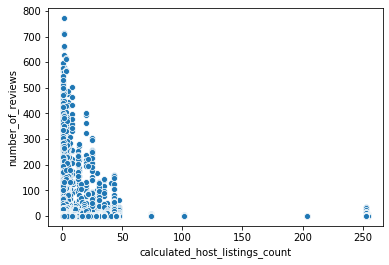

In [17]:
# mapping the relation between listing counts and # of reviews
sns.scatterplot(x='calculated_host_listings_count',y='number_of_reviews', data = df)


Finding: follows the hypothesis that most people have a few amount of listings with varying number of reviews

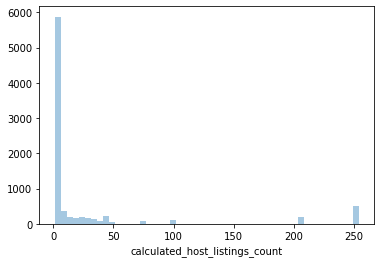

In [19]:
# mapping out distribution of listings
sns.distplot(df['calculated_host_listings_count'].dropna(), kde=False)

Finding: Most hosts has fewer listings (I wonder who the 250 listings belong too..)

Part 2: Exploring Price

In [20]:
#pulling out basic stats around price
df['price'].describe()

count     8333.000000
mean       216.530181
std        302.962072
min          0.000000
25%         99.000000
50%        150.000000
75%        235.000000
max      10000.000000
Name: price, dtype: float64

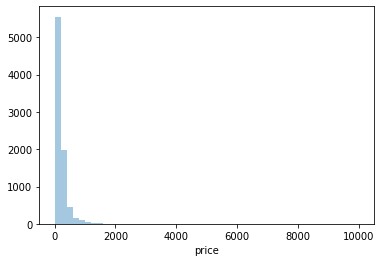

In [21]:
# mapping out distribution of prices
sns.distplot(df['price'].dropna(), kde=False)

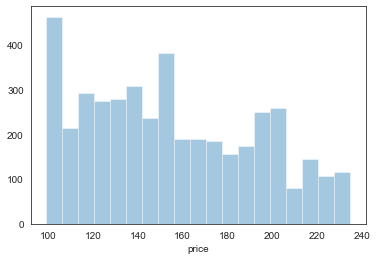

In [155]:
# mapping out distribution of prices within the 25% to 75% percentile to better identify the trend
sns.distplot(df.loc[(df['price'] >= 99) & (df['price'] <= 235)]['price'], kde = False)

Deeper Dive into Dimensions that Influence Price

In [201]:
#avg price per neighborhood
neighborhood_avg = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

In [202]:
#df.groupby('neighbourhood_cleansed')[numerical_list].mean().reset_index()

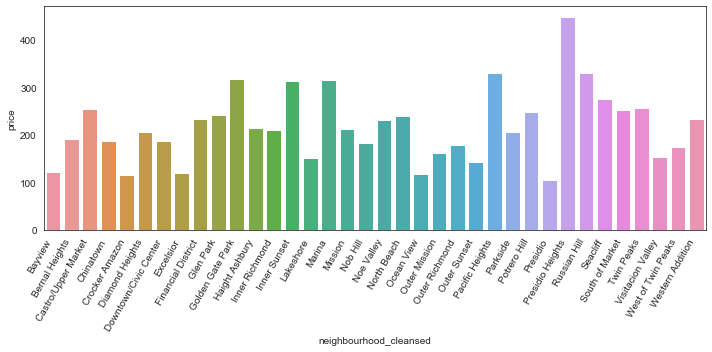

In [203]:
plt.figure(figsize=(10,5))
bp = sns.barplot(x='neighbourhood_cleansed', y='price', data = neighborhood_avg)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 60, ha = 'right')
plt.tight_layout()
plt.show()

Finding: The average price differs by neighborhoods. Presidio Heights has the highest mean while Crocker Amazon has the lowest (I think Presidio may be an error).

In [28]:
df.loc[df['neighbourhood_cleansed']=='Presidio'] #pulling Presidio out
#found that this listing is actually in the Richmond District 

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,security_deposit_null_flag,security_deposit_buckets
1071,3093543,https://www.airbnb.com/rooms/3093543,Studio with own entrance and garden views.,"Nicely furnished, quiet and private. Looking o...",The studio is 400 sq. ft. contemporary and min...,"Nicely furnished, quiet and private. Looking o...",none,Clement Street is a multicultural mosaic of re...,NaN,Transportation is great. Route #1 California ...,...,flexible,f,f,1.0,0.0,1.0,0.0,3.66,True,Not Filled Out


In [204]:
#avg price per room type
room_type_avg = df.groupby('room_type')['price'].mean().reset_index()

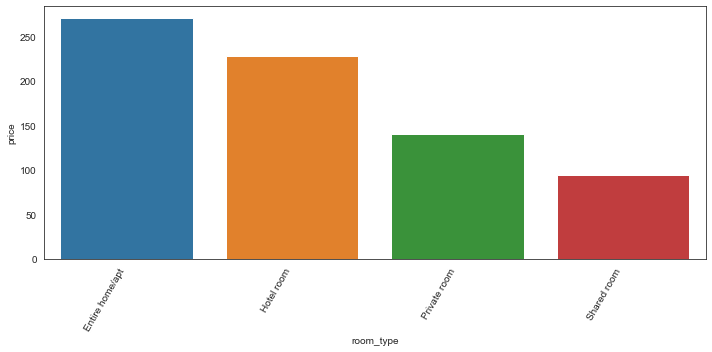

In [205]:
plt.figure(figsize=(10,5))
bp = sns.barplot(x='room_type', y='price', data = room_type_avg)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 60, ha = 'right')
plt.tight_layout()
plt.show()

Finding: There is a distinction in average price across room types. Entire homes/apt sees a higher average than shared room.

In [29]:
# avg prices by Host Status
# df.groupby('neighbourhood_cleansed','host_is_superhost').mean().reset_index()
neighborhood_pivot = pd.pivot_table(df, values = 'price' , index = ['neighbourhood_cleansed'],
               columns = ['host_is_superhost'], aggfunc = np.mean
              ).reset_index()

In [30]:
melted_neighborhood = pd.melt(neighborhood_pivot, id_vars = ['neighbourhood_cleansed'],
       value_vars = ['f','t']
       )

In [31]:
melted_neighborhood

,neighbourhood_cleansed,host_is_superhost,value
0,Bayview,f,125.361111
1,Bernal Heights,f,208.277487
2,Castro/Upper Market,f,301.373950
3,Chinatown,f,210.009901
4,Crocker Amazon,f,104.461538
...,...,...,...
67,South of Market,t,295.509009
68,Twin Peaks,t,254.108108
69,Visitacion Valley,t,156.341463
70,West of Twin Peaks,t,139.709302


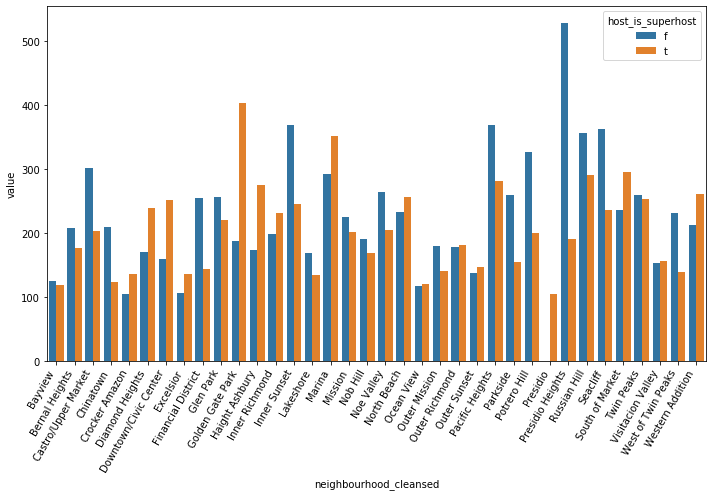

In [32]:
plt.figure(figsize=(10,7))
bp = sns.barplot(x='neighbourhood_cleansed', y='value', hue = "host_is_superhost",data = melted_neighborhood)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 60, ha = 'right')
plt.tight_layout()
plt.show()

Finding: Contrary to my initial hypothesis that Superhost has a higher average price, that is not actually the case. The neighborhood seems to determine if superhost charges more vs. non-superhostst. It appears that non-superhost in Presidio Heights has a much higher price point than superhost. On the contrary, Golden Gate Park sees superhost with a higher price point compared to non-Superhost.

In [48]:
# breakdown by prices
df.groupby('cancellation_policy').count()['id']

cancellation_policy
flexible                       1816
moderate                       2639
strict                          111
strict_14_with_grace_period    3707
super_strict_30                  47
super_strict_60                  13
Name: id, dtype: int64

Finding: The majority of the listings is one of the 3 types of cancellation.

In [65]:
limited_cancellation = df.loc[df['cancellation_policy'].isin (['flexible','moderate','strict_14_with_grace_period'])] 

In [71]:
limited_cancellation.groupby('cancellation_policy')['price'].mean().reset_index()

,cancellation_policy,price
0,flexible,192.140419
1,moderate,208.724517
2,strict_14_with_grace_period,234.238198


Finding: Stricter cancellation has higher price.

In [49]:
cancellation_rating

,cancellation_policy,review_scores_rating
0,flexible,94.315539
1,moderate,96.545873
2,strict,93.750000
3,strict_14_with_grace_period,95.245697
4,super_strict_30,92.676471
5,super_strict_60,99.666667


Finding: Wanted to make sure that stricter policy doesn't have lower ratings and it seems like having a stricter cancellation policy doesn't mean the listing will have a lower rating